In [29]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score

In [7]:
car_data = pd.read_csv("car_data.csv", header = 0)
car_data.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [8]:
car_data.shape
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [9]:
# Limpiar los datos
car_data.drop(['User ID'], axis = 1, inplace = True)
car_data['Gender'].replace(['Male', 'Female'],[0, 1], inplace=True)
car_data.head()

,Gender,Age,AnnualSalary,Purchased
0,0,35,20000,0
1,0,40,43500,0
2,0,49,74000,0
3,0,40,107500,1
4,0,25,79000,0


In [10]:
# Obtener la Y de la base de datos
Y = car_data['Purchased']
X = car_data.drop(['Purchased'], axis = 1)

In [11]:
# Normalizar los datos
scaler = StandardScaler()
X_trans = scaler.fit_transform(X)

In [12]:
# Dividir en train y test
x_train, x_test, y_train, y_test = train_test_split(X_trans, Y, test_size = 0.2)

In [13]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 3), (200, 3), (800,), (200,))

## Modelo Inicial

In [38]:
# Crear el modelo con 1 sola capa oculta
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 2, activation = "relu", input_dim = x_train.shape[1]))
model.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))

In [39]:
# Compilar el modelo
model.compile(
    optimizer = "sgd",
    loss = "binary_crossentropy",
    metrics = [tf.keras.metrics.BinaryAccuracy()]
)

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 2)                 8         
                                                                 
 dense_8 (Dense)             (None, 1)                 3         
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Entrenar el modelo
print('Inicio del entrenamiento')
historia = model.fit(x_train, y_train, epochs = 150, verbose = True)
print("Modelo entrenado")

Inicio del entrenamiento
Epoch 1/150
25/25 [==============================] - 1s 3ms/step - loss: 0.7619 - binary_accuracy: 0.3738
Epoch 2/150
25/25 [==============================] - 0s 2ms/step - loss: 0.7400 - binary_accuracy: 0.4087
Epoch 3/150
25/25 [==============================] - 0s 3ms/step - loss: 0.7205 - binary_accuracy: 0.4338
Epoch 4/150
25/25 [==============================] - 0s 2ms/step - loss: 0.7026 - binary_accuracy: 0.4638
Epoch 5/150
25/25 [==============================] - 0s 5ms/step - loss: 0.6851 - binary_accuracy: 0.4850
Epoch 6/150
25/25 [==============================] - 0s 5ms/step - loss: 0.6688 - binary_accuracy: 0.5063
Epoch 7/150
25/25 [==============================] - 0s 6ms/step - loss: 0.6532 - binary_accuracy: 0.5163
Epoch 8/150
25/25 [==============================] - 0s 6ms/step - loss: 0.6382 - binary_accuracy: 0.5263
Epoch 9/150
25/25 [==============================] - 0s 5ms/step - loss: 0.6246 - binary_accuracy: 0.5412
Epoch 10/150
25/25 [=

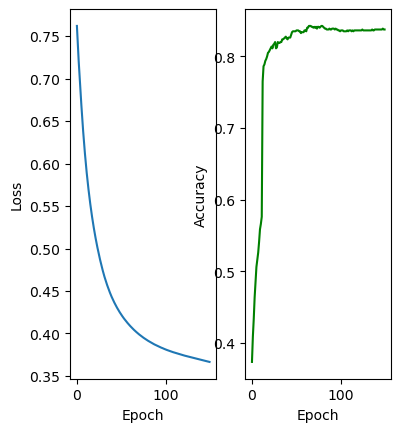

In [42]:
# Graficar la pérdida
plt.subplot(1, 3, 1)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(historia.history["loss"])

# Graficar el accuracy
plt.subplot(1, 3, 2)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(historia.history["binary_accuracy"], color = "green")

plt.show()

## Predicciones

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score
y_hat=model.predict(x_test)
y_hat=[0 if val<0.5 else 1 for val in y_hat]
print("Roc AUC: ", roc_auc_score(y_test,y_hat))
print("Binary Accuracy: ", accuracy_score(y_test,y_hat))

7/7 [==============================] - 0s 4ms/step
Roc AUC:  0.8418495468937657
Binary Accuracy:  0.845


# Mejora de Modelo

In [31]:
# Crear el modelo
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(units = 2, activation = "relu", input_dim = x_train.shape[1]))
model2.add(tf.keras.layers.Dense(units = 3, activation = "relu"))
model2.add(tf.keras.layers.Dense(units = 3, activation = "relu"))
model2.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))

In [32]:
# Compilar el modelo
model2.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = [tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC()]
)

In [33]:
# Entrenar el modelo
print('Inicio del entrenamiento')
historia = model2.fit(X_trans, Y, epochs = 200, verbose = True, validation_split = 0.2)
print("Modelo entrenado")

Inicio del entrenamiento
Epoch 1/200
25/25 [==============================] - 1s 10ms/step - loss: 0.6977 - binary_accuracy: 0.4650 - auc_4: 0.4818 - val_loss: 0.6934 - val_binary_accuracy: 0.4650 - val_auc_4: 0.5285
Epoch 2/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6908 - binary_accuracy: 0.5587 - auc_4: 0.5374 - val_loss: 0.6875 - val_binary_accuracy: 0.6850 - val_auc_4: 0.5736
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6853 - binary_accuracy: 0.6237 - auc_4: 0.6619 - val_loss: 0.6823 - val_binary_accuracy: 0.6200 - val_auc_4: 0.7850
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6808 - binary_accuracy: 0.6000 - auc_4: 0.7500 - val_loss: 0.6785 - val_binary_accuracy: 0.6200 - val_auc_4: 0.7302
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6770 - binary_accuracy: 0.6037 - auc_4: 0.7480 - val_loss: 0.6744 - val_binary_accuracy: 0.6250 - val_auc_4: 0.7547
Epoch 6/200
25/25 [

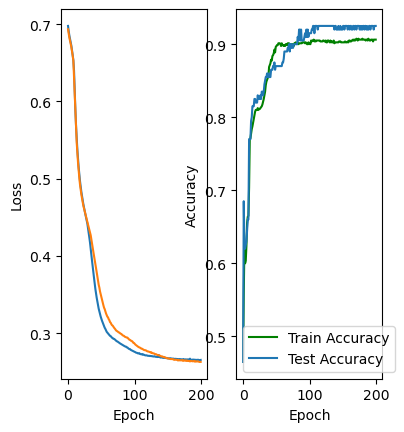

In [34]:
# Graficar la pérdida
plt.subplot(1, 3, 1)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(historia.history["loss"], label='Train Loss')
plt.plot(historia.history["val_loss"], label='Test Loss')

# Graficar el accuracy
plt.subplot(1, 3, 2)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(historia.history["binary_accuracy"], color = "green", label='Train Accuracy')
plt.plot(historia.history["val_binary_accuracy"], label='Test Accuracy')

plt.legend()
plt.show()


## Predicciones

In [35]:
y_hat=model2.predict(x_test)
y_hat=[0 if val<0.5 else 1 for val in y_hat]
print("Roc AUC: ", roc_auc_score(y_test,y_hat))
print("Binary Accuracy: ", accuracy_score(y_test,y_hat))

7/7 [==============================] - 0s 1ms/step
Roc AUC:  0.9146869390771829
Binary Accuracy:  0.91
